# Diamond data set 

In [392]:
#	Import functions 

In [393]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [394]:
#   Load the data set 

In [395]:
data=sns.load_dataset("diamonds")

In [396]:
data

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
29542   0.40       Fair     H     VS2   65.1   59.0    704  4.58  4.63  3.00
29543   0.43    Premium     E     SI2   61.0   60.0    704  4.87  4.94  2.99
29544   0.43       Good     G     SI1   63.6   55.0    704  4.79  4.83  3.06
29545   0.43       Good     G     SI1   63.1   58.0    704  4.75  4.79  3.01
29546   0.38  Very Good     G     VS2   61.6   59.0    705  4.65  4.70   NaN

[29547 rows x 10 columns]

In [397]:
# start with indexing 1 use this code

In [398]:
data.index = range(1, len(data) + 1)

In [399]:
data

carat        cut color clarity  depth  table  price     x     y     z
1       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
29543   0.40       Fair     H     VS2   65.1   59.0    704  4.58  4.63  3.00
29544   0.43    Premium     E     SI2   61.0   60.0    704  4.87  4.94  2.99
29545   0.43       Good     G     SI1   63.6   55.0    704  4.79  4.83  3.06
29546   0.43       Good     G     SI1   63.1   58.0    704  4.75  4.79  3.01
29547   0.38  Very Good     G     VS2   61.6   59.0    705  4.65  4.70   NaN

[29547 rows x 10 columns]

In [400]:
# check null values in data set

In [401]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          1
dtype: int64

In [402]:
# Remove them because only one is in z column

In [403]:
data.dropna(inplace=True)

In [404]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [405]:
# check 0 values in data set

In [406]:
(data==0).sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           6
y           5
z          17
dtype: int64

In [407]:
# in x,y,z there is 0 values 
# we have to put the histplot after that we have conclude which type of method we have to add

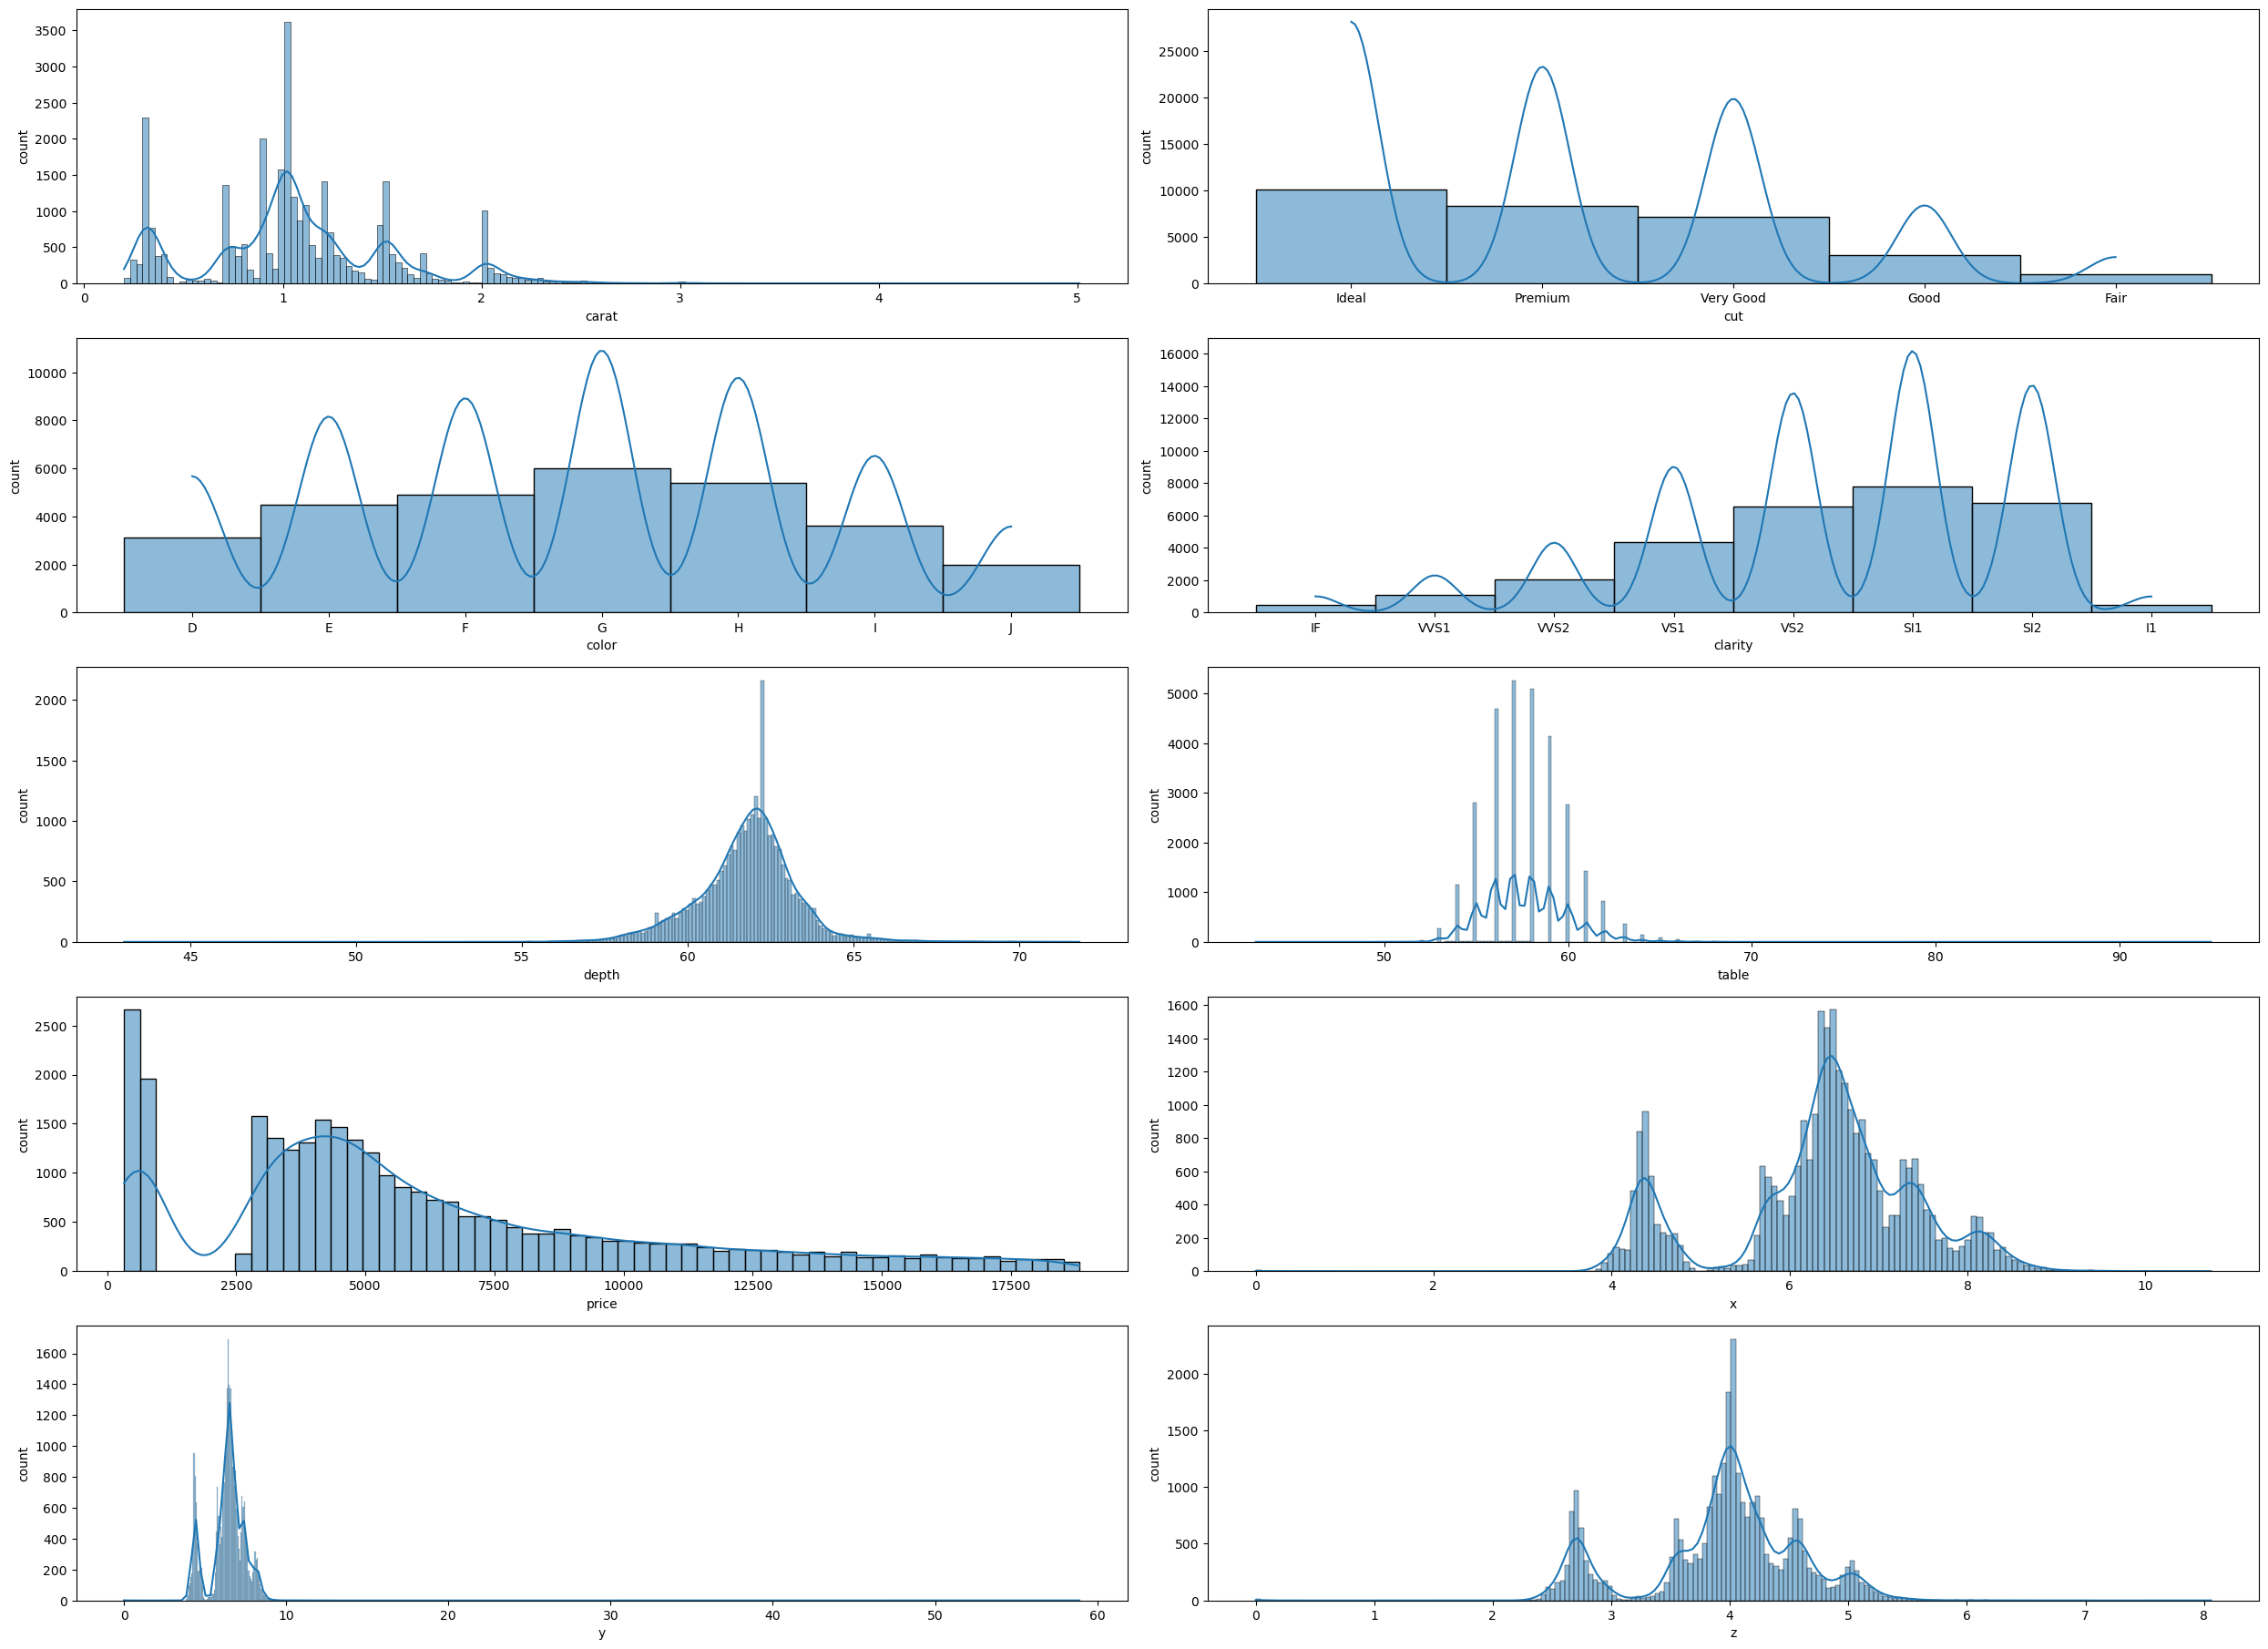

In [408]:
plt.figure(figsize=(25,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=15:
        ax=plt.subplot(7,2,plotnumber)
        sns.histplot(x=data[column],kde=True)
        plt.xlabel(column,fontsize=10)
        plt.ylabel("count",fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [409]:
# slightly we can see that there is normal distribution in x, y, z
# we have to put mean or median values in that 0
# before i made this project i put the median values into it after that it gave adjusted score and r2 score as 0.45
# so we have to put mean value instead of median value


In [410]:
data['x'] = data['x'].replace(0, np.mean(data['x']))

In [411]:
data['y'] = data['y'].replace(0, np.mean(data['y']))

In [412]:
data['z'] = data['z'].replace(0, np.mean(data['z']))

In [413]:
(data==0).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

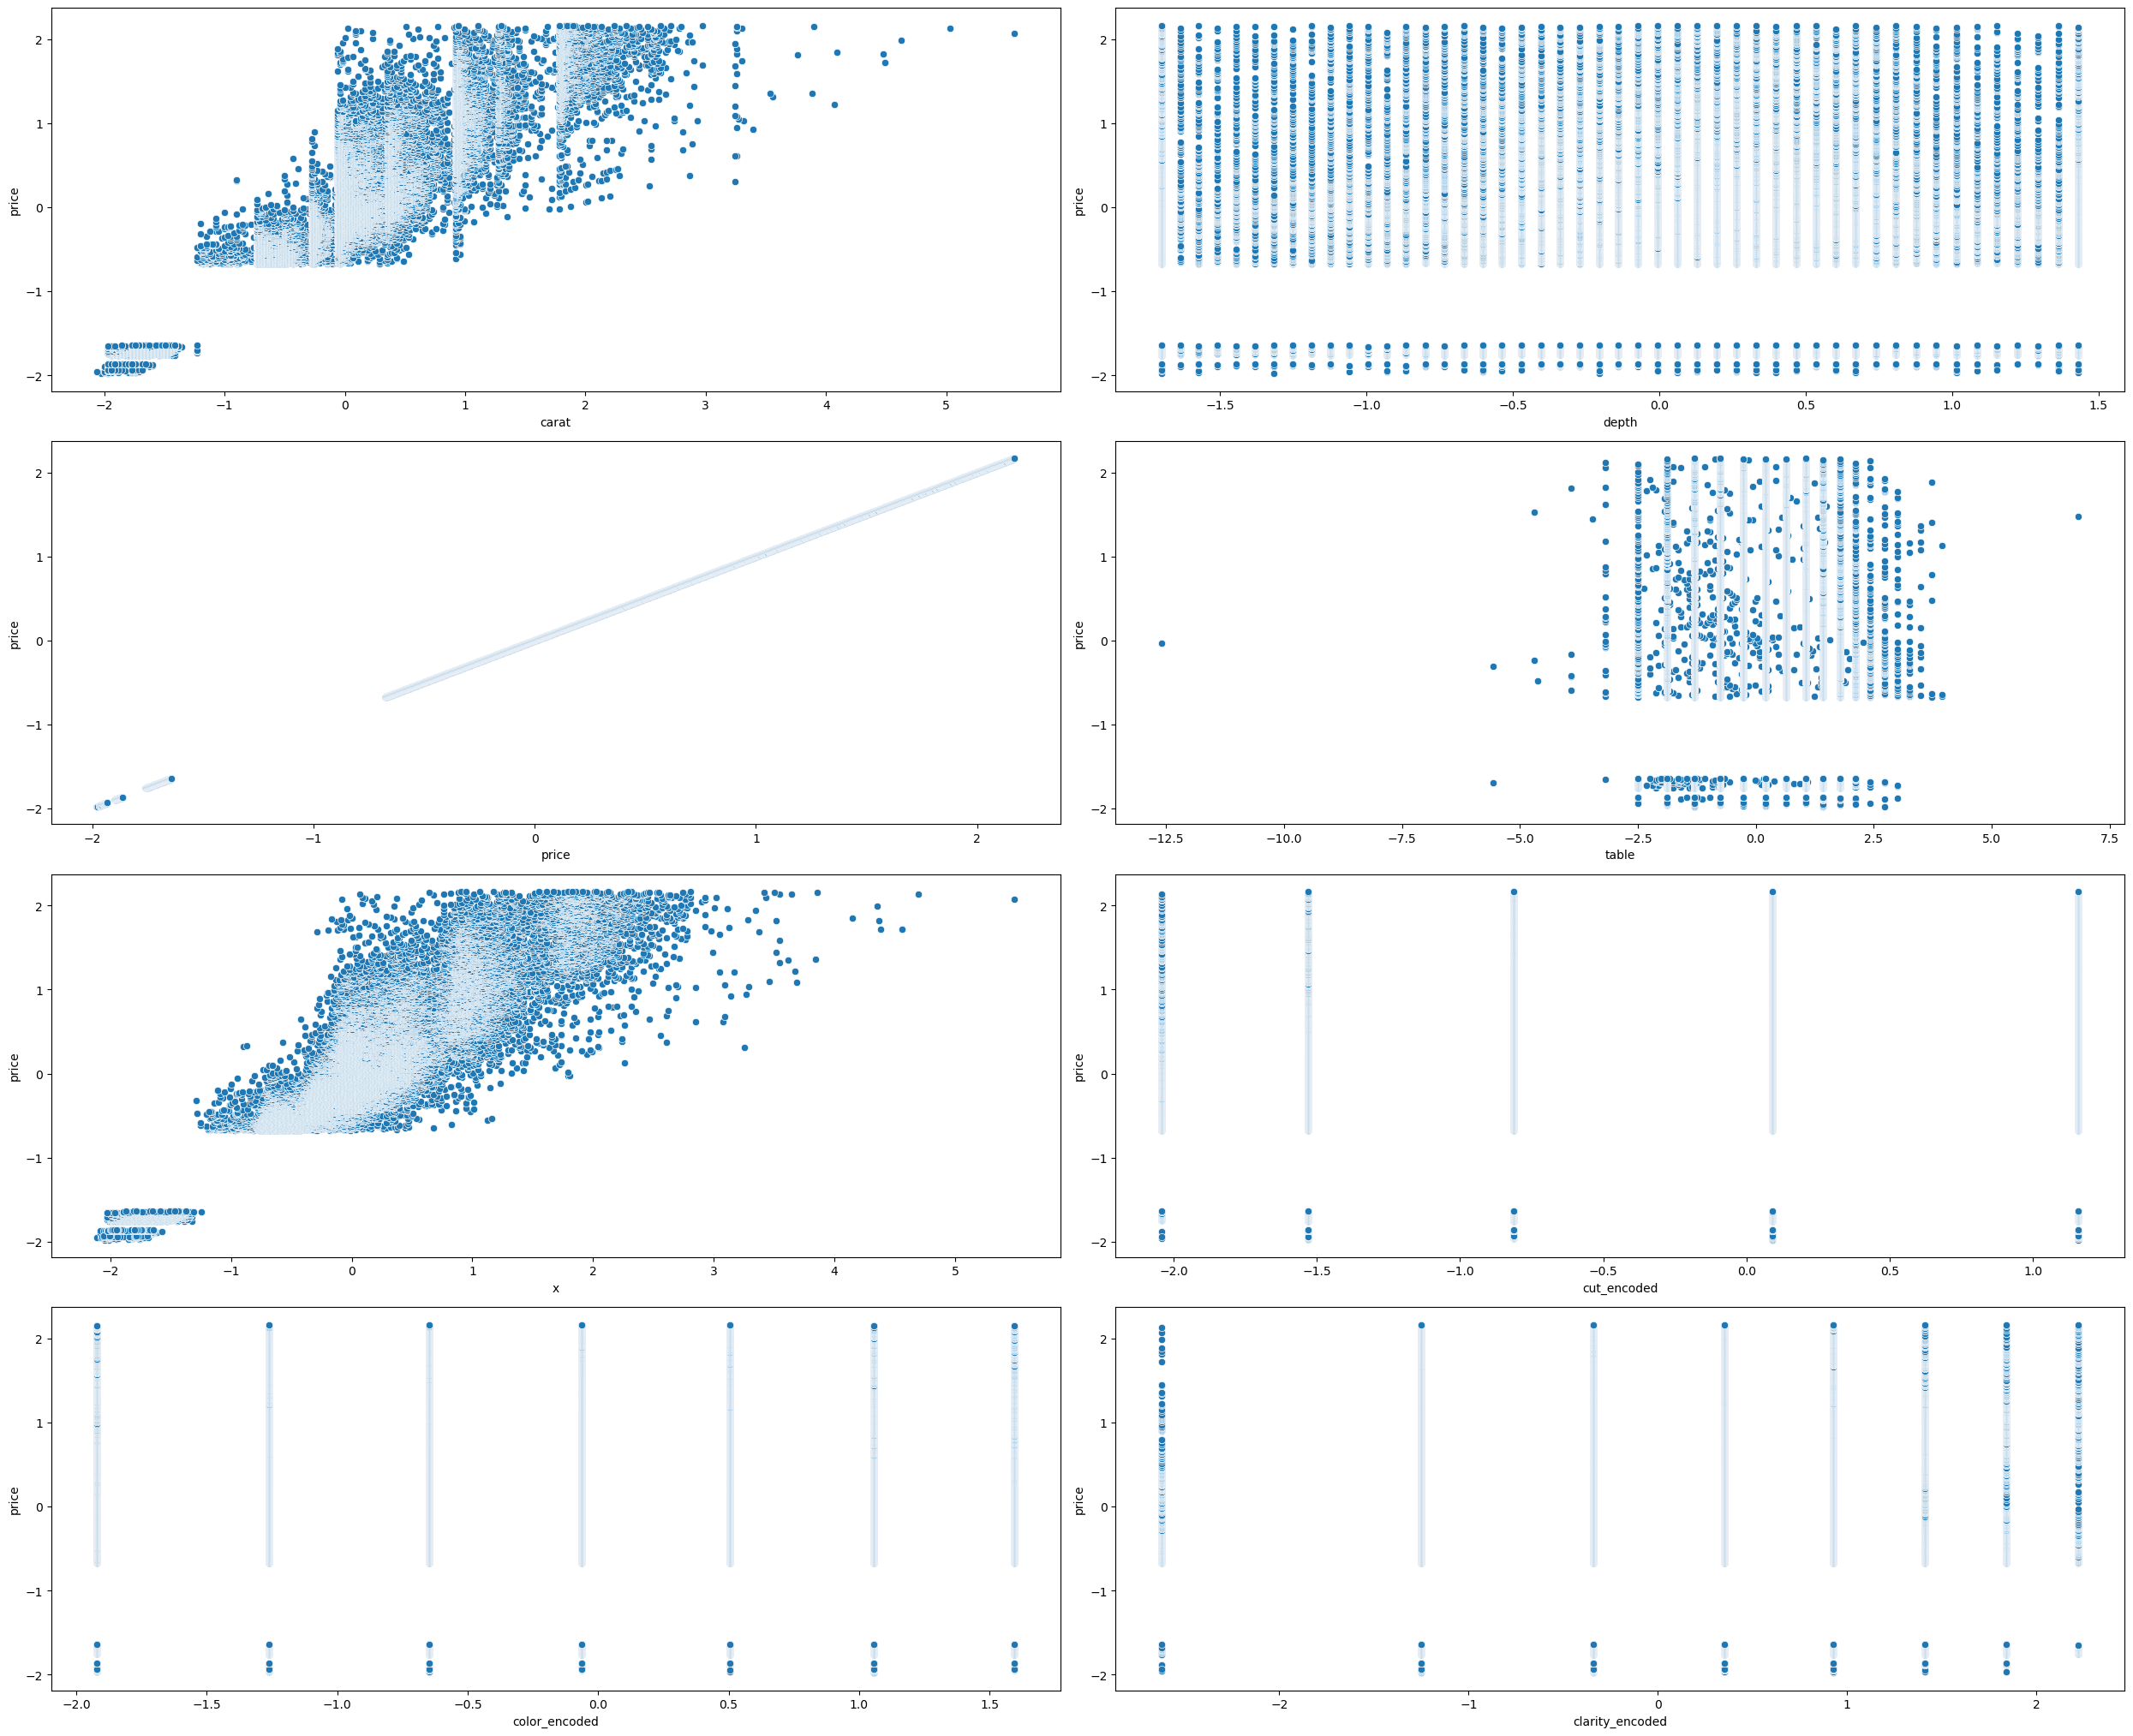

In [462]:
plt.figure(figsize=(25,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=11:
        ax=plt.subplot(5,2,plotnumber)
        sns.scatterplot(data=data,x=column,y="price")
        plt.xlabel(column,fontsize=10)
        #plt.ylabel("count",fontsize=10)
    plotnumber+=1
plt.tight_layout()

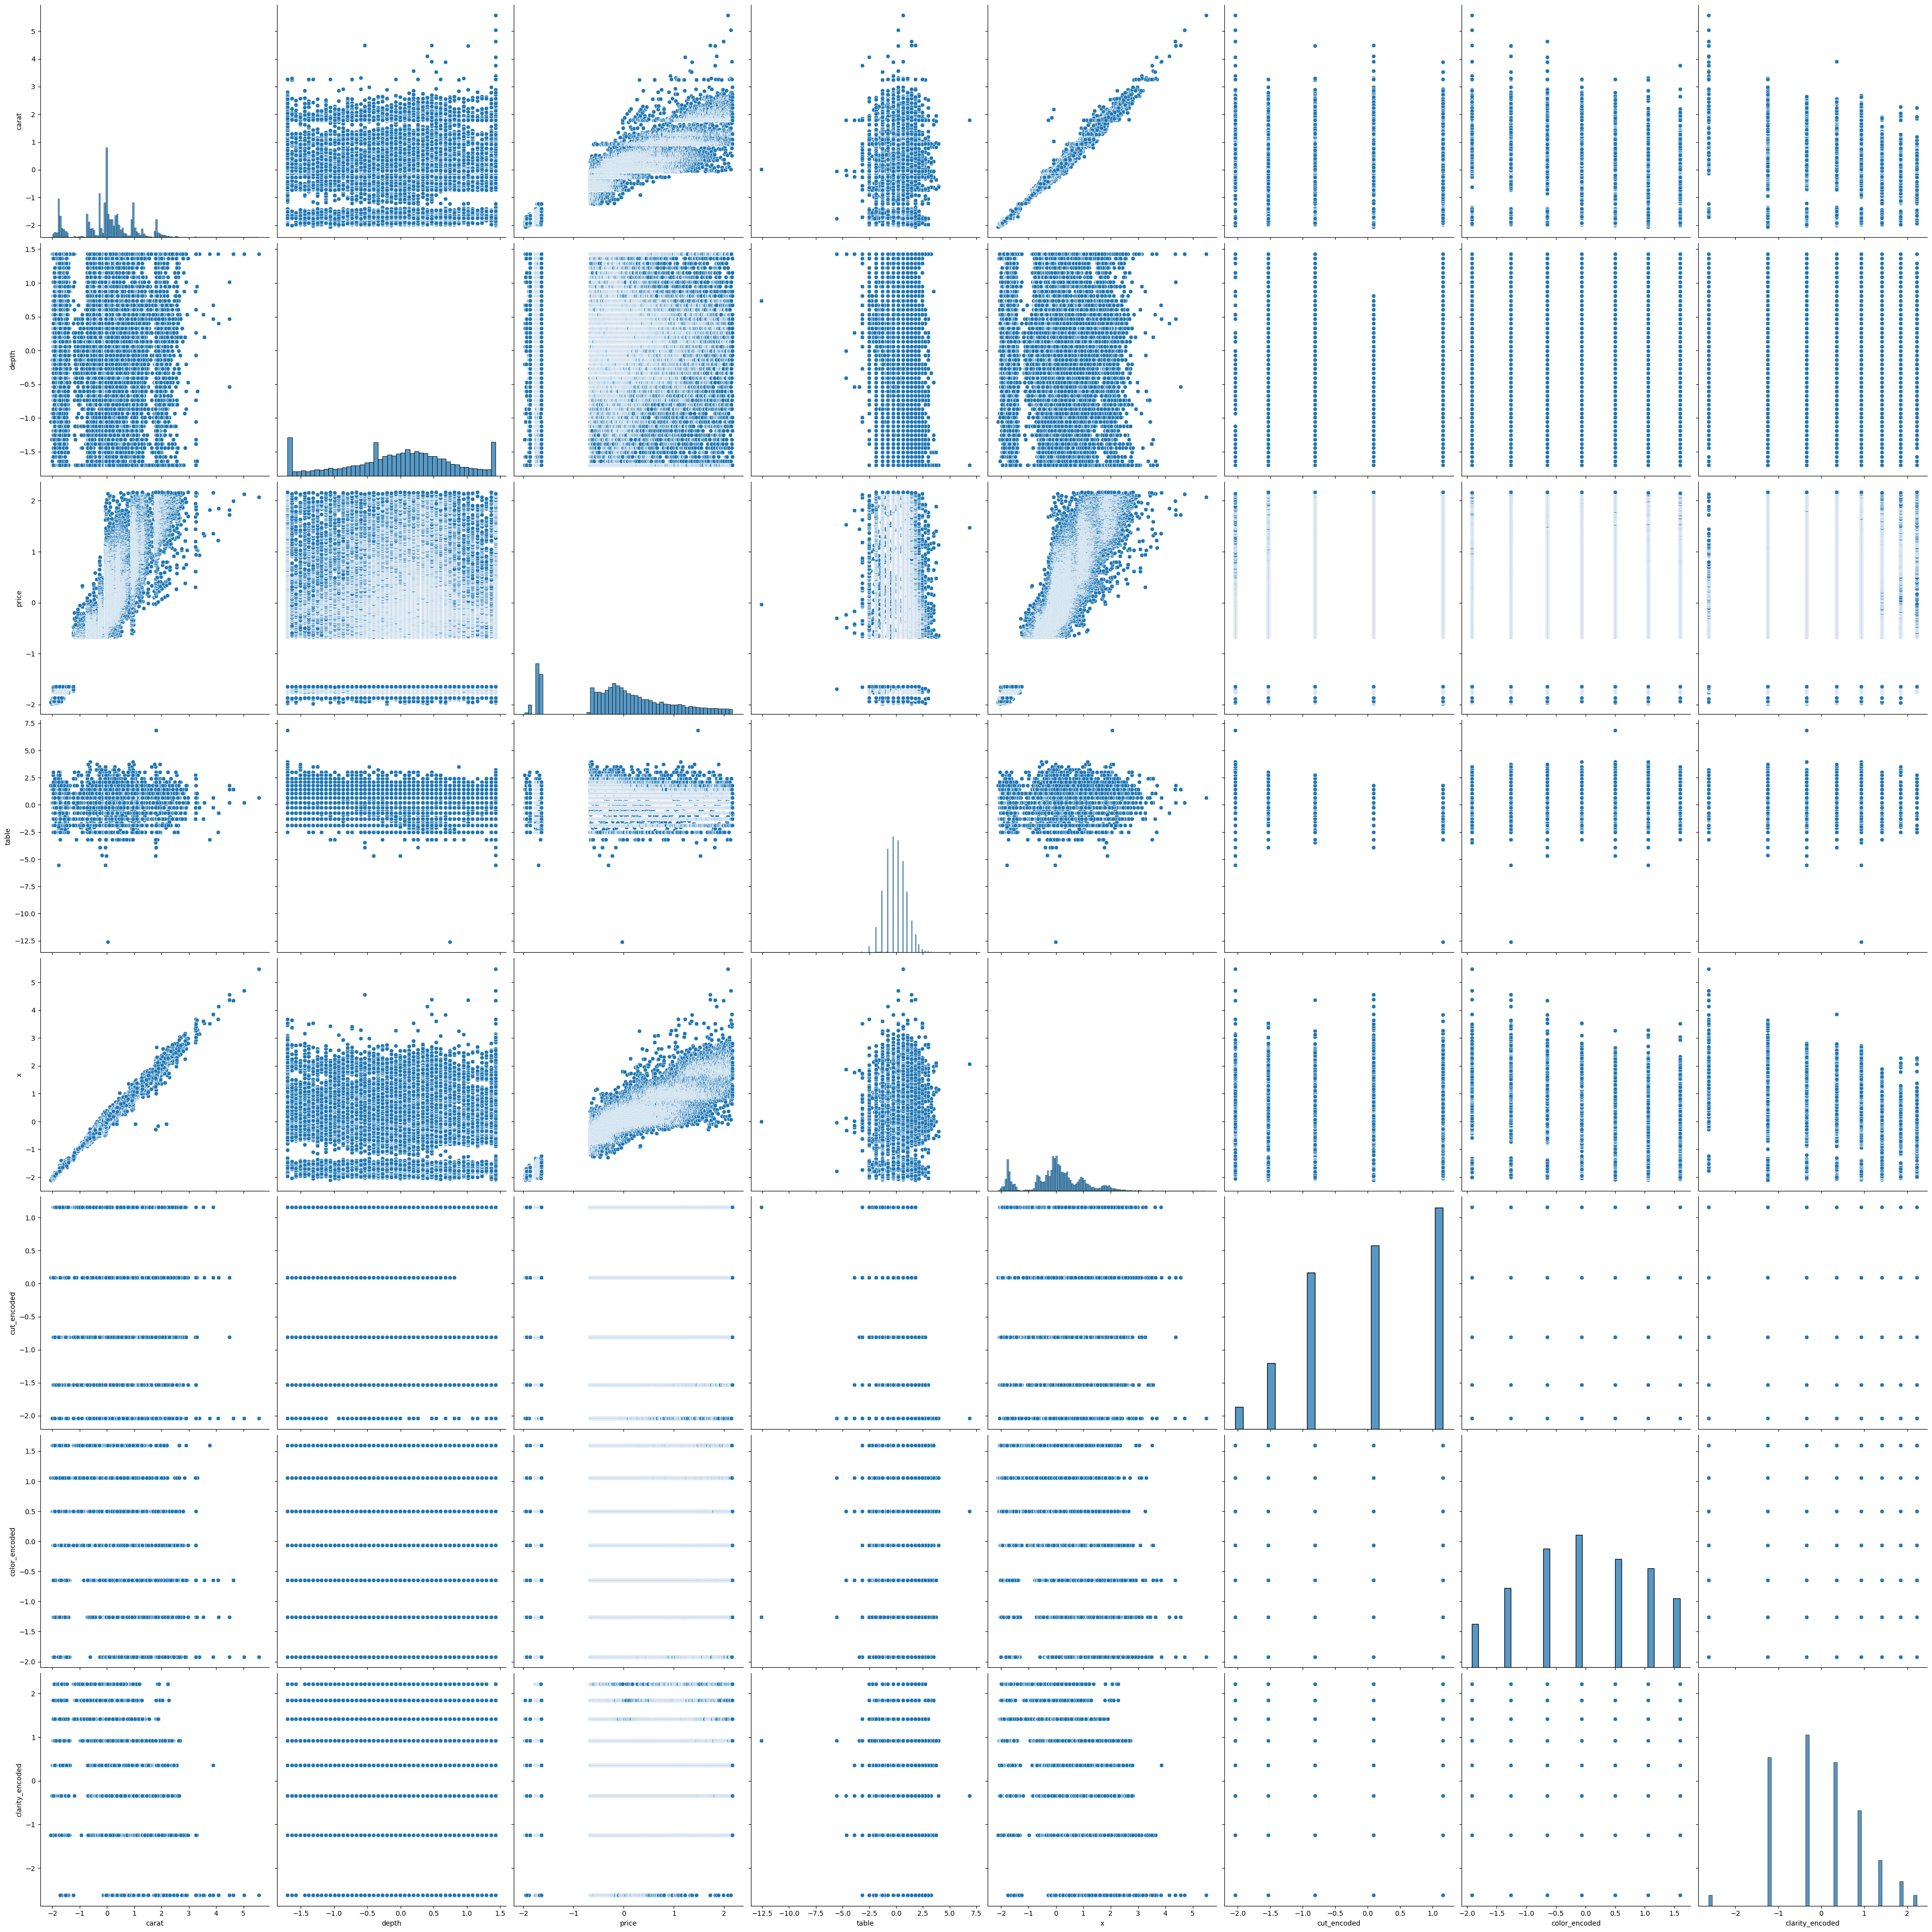

In [464]:
sns.pairplot(data,height=5)

In [414]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29546 entries, 1 to 29546
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    29546 non-null  float64 
 1   cut      29546 non-null  category
 2   color    29546 non-null  category
 3   clarity  29546 non-null  category
 4   depth    29546 non-null  float64 
 5   table    29546 non-null  float64 
 6   price    29546 non-null  int64   
 7   x        29546 non-null  float64 
 8   y        29546 non-null  float64 
 9   z        29546 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 1.9 MB


In [415]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [416]:
# we have to use ordinal encoding for cut, color, clarity
# because it is in the hierarchy
# so we used ordinal encoding

# Ordinal Encoding 

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

encoder = OrdinalEncoder(categories=[cut_order, color_order, clarity_order])

data[['cut_encoded', 'color_encoded', 'clarity_encoded']] = encoder.fit_transform(
    data[['cut', 'color', 'clarity']]
)


In [418]:
data

carat      cut color clarity  depth  table  price     x     y     z  \
1       0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
2       0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
3       0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
4       0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
5       0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...      ...   ...     ...    ...    ...    ...   ...   ...   ...   
29542   0.42    Ideal     G     SI1   62.2   53.0    704  4.80  4.84  3.00   
29543   0.40     Fair     H     VS2   65.1   59.0    704  4.58  4.63  3.00   
29544   0.43  Premium     E     SI2   61.0   60.0    704  4.87  4.94  2.99   
29545   0.43     Good     G     SI1   63.6   55.0    704  4.79  4.83  3.06   
29546   0.43     Good     G     SI1   63.1   58.0    704  4.75  4.79  3.01   

       cut_encoded  color_encoded  clarity_encoded  
1              4.0            5.0              1.0  
2              3.0            5.0              2.0  
3              1.0            5.0              4.0  
4              3.0            1.0              3.0  
5              1.0            0.0              1.0  
...            ...            ...              ...  
29542          4.0            3.0              2.0  
29543          0.0            2.0              3.0  
29544          3.0            5.0              1.0  
29545          1.0            3.0              2.0  
29546          1.0            3.0              2.0  

[29546 rows x 13 columns]

# Checking Skewness and Kurtosis

In [419]:
# we have to use reduce skewness and kurtosis because to obtain normal distribution for the graph
# first we have to check the skewness and kurtosis graph after we have to conclude

In [ ]:
from scipy.stats import skew, kurtosis

numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Print header
print(f"{'Column':<15} {'Skewness':>10} {'Kurtosis':>12}")
print("-" * 40)

for col in numerical_cols:
    skw = skew(data[col], nan_policy='omit')
    krt = kurtosis(data[col], nan_policy='omit')
    print(f"{col:<15} {skw:>10.4f} {krt:>12.4f}")


Column            Skewness     Kurtosis
----------------------------------------
carat               0.5097       0.8399
depth              -0.2241       4.8163
table               0.6867       3.4514
price               0.9373       0.3751
x                  -0.4609      -0.0429
y                   3.2631     175.3013
z                  -0.4541       0.0588
cut_encoded        -0.6088      -0.4830
color_encoded      -0.0331      -0.9244
clarity_encoded     0.6851      -0.0009


In [421]:
# clearly we can see that there is a high skewness in y. In our model some values are highly skewd.

# -0.5 to +0.5	               Fairly symmetric
# -1 to -0.5 or +0.5 to +1	   Moderate skewness	
#  <-1 or >+1	               Highly skewed

# Mesokurtic	= 3	Normal distribution (ideal baseline)
# Leptokurtic	> 3	Heavy tails → more outliers
# Platykurtic	< 3	Light tails → fewer outliers, flatter distribution 

# Apply PowerTransformer (Yeo-Johnson works with 0 and negative)

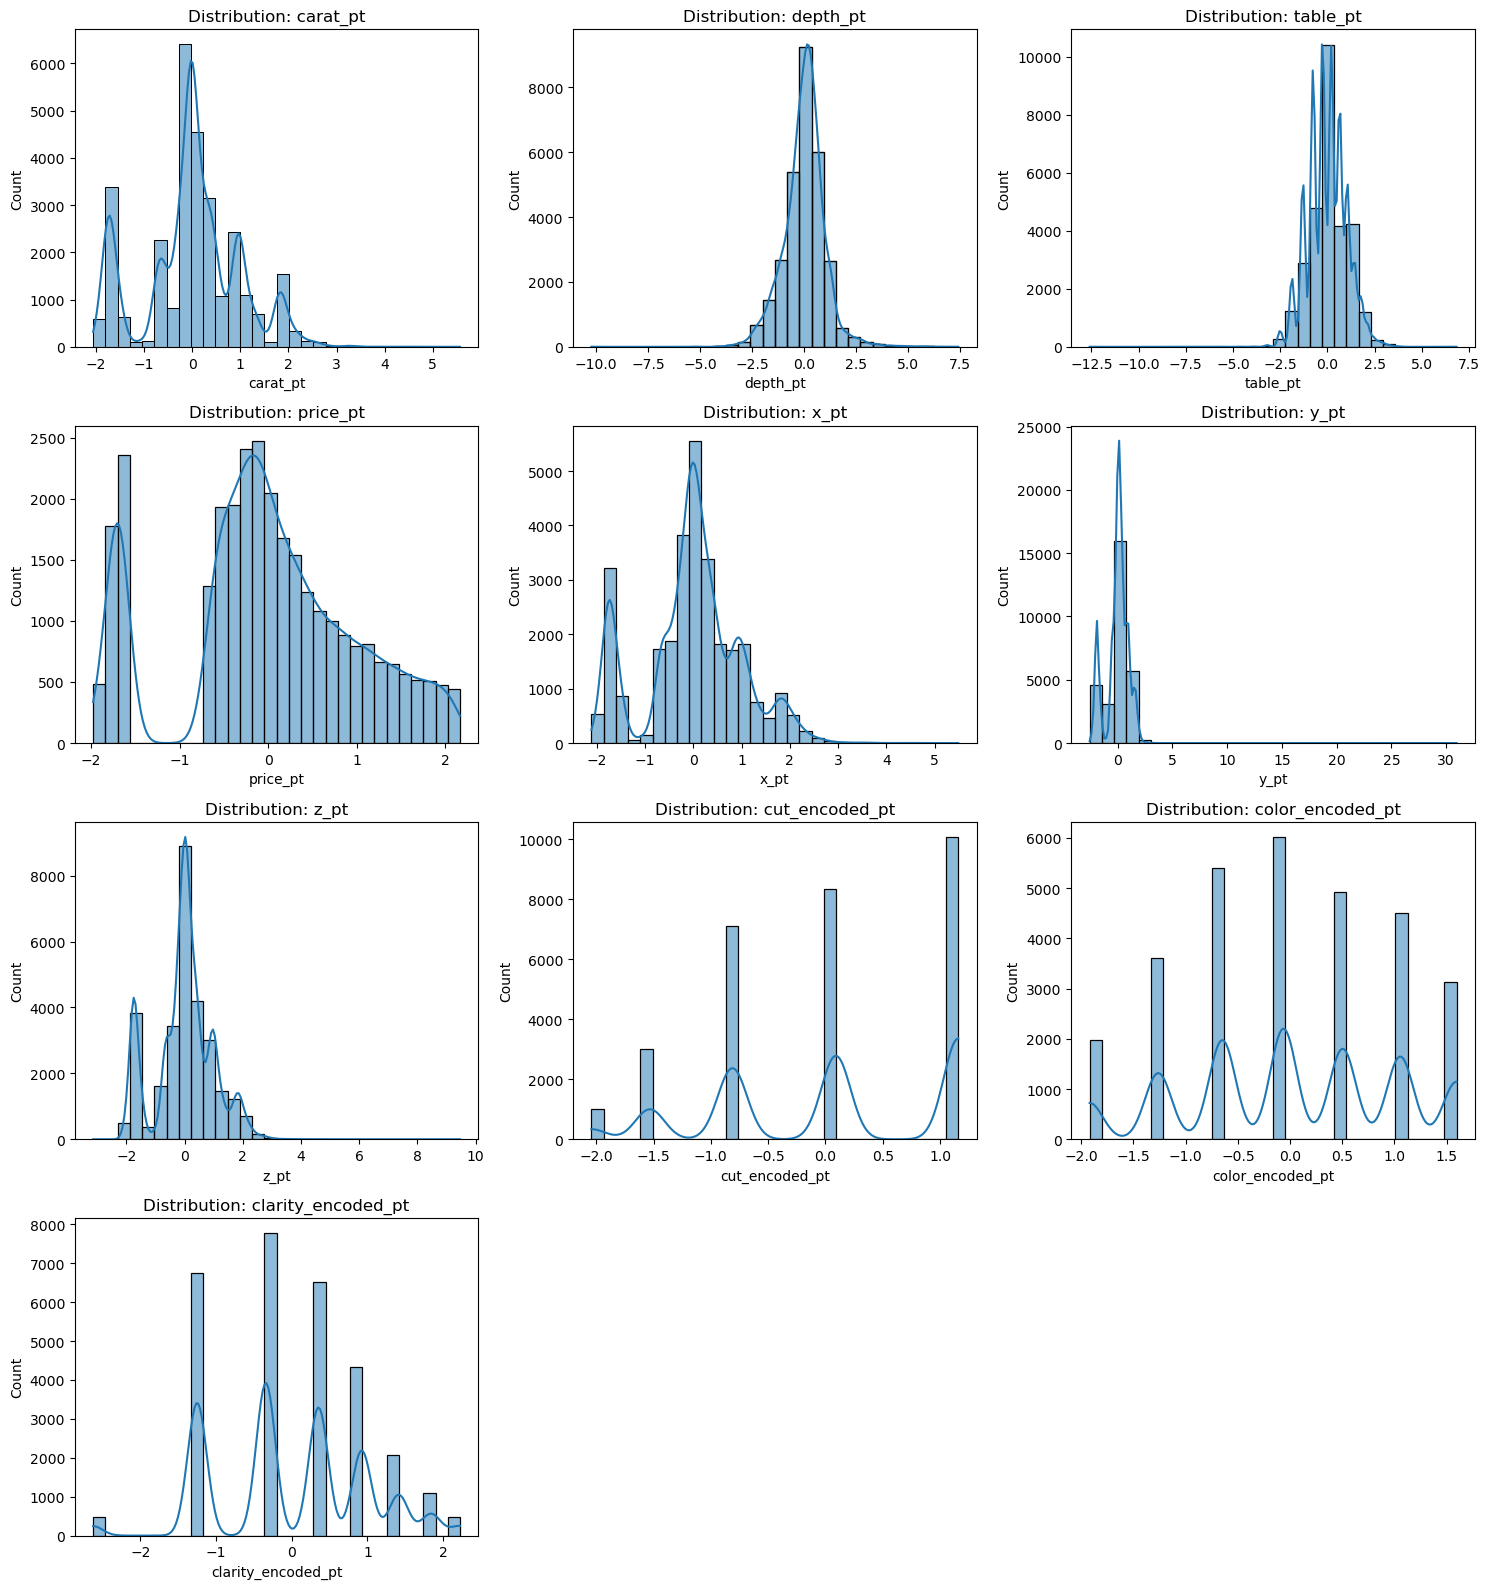

In [422]:

from sklearn.preprocessing import PowerTransformer

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = [col for col in numeric_cols if data[col].nunique() > 1]
pt = PowerTransformer(method='yeo-johnson')
transformed_data = pd.DataFrame(pt.fit_transform(data[numeric_cols]), columns=[col + '_pt' for col in numeric_cols])
n_cols = 3
n_rows = (len(transformed_data.columns) + n_cols - 1) // n_cols
plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(transformed_data.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(transformed_data[col], kde=True, bins=30)
    plt.title(f'Distribution: {col}')
    plt.tight_layout()

plt.show()


In [423]:

from scipy.stats import skew, kurtosis
numerical_cols = transformed_data.columns

print(f"{'Column':<20} {'Skewness':>10} {'Kurtosis':>12}")
print("-" * 45)

for col in numerical_cols:
    skew_val = skew(transformed_data[col])
    kurt_val = kurtosis(transformed_data[col])  
    print(f"{col:<20} {skew_val:>10.4f} {kurt_val:>12.4f}")


Column                 Skewness     Kurtosis
---------------------------------------------
carat_pt                -0.0007       0.0261
depth_pt                 0.0757       3.9242
table_pt                -0.0273       0.9794
price_pt                -0.0864      -0.4039
x_pt                    -0.0235       0.0495
y_pt                     0.4372      30.8613
z_pt                    -0.0026       0.4073
cut_encoded_pt          -0.2545      -1.1256
color_encoded_pt        -0.1390      -0.8637
clarity_encoded_pt      -0.0133      -0.4524


In [424]:
# We can see that kurtosis value in y_pt as 30.86
# After applied power transformer the y value doesn't change so we have to neglect as it is same.   

In [425]:

from sklearn.preprocessing import PowerTransformer

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = [col for col in numeric_cols if data[col].nunique() > 1]

pt = PowerTransformer(method='yeo-johnson')
transformed_array = pt.fit_transform(data[numeric_cols])

data[numeric_cols] = transformed_array

In [426]:
from scipy.stats import skew, kurtosis
numerical_cols = transformed_data.columns

print(f"{'Column':<20} {'Skewness':>10} {'Kurtosis':>12}")
print("-" * 45)

for col in numerical_cols:
    skew_val = skew(transformed_data[col])
    kurt_val = kurtosis(transformed_data[col])  
    print(f"{col:<20} {skew_val:>10.4f} {kurt_val:>12.4f}")

Column                 Skewness     Kurtosis
---------------------------------------------
carat_pt                -0.0007       0.0261
depth_pt                 0.0757       3.9242
table_pt                -0.0273       0.9794
price_pt                -0.0864      -0.4039
x_pt                    -0.0235       0.0495
y_pt                     0.4372      30.8613
z_pt                    -0.0026       0.4073
cut_encoded_pt          -0.2545      -1.1256
color_encoded_pt        -0.1390      -0.8637
clarity_encoded_pt      -0.0133      -0.4524


In [427]:
data


carat      cut color clarity     depth     table     price  \
1     -1.970629    Ideal     E     SI2 -0.205357 -1.299280 -1.978440   
2     -2.029918  Premium     E     SI1 -1.316978  1.430547 -1.978440   
3     -1.970629     Good     E     VS1 -3.121801  2.722682 -1.977312   
4     -1.796569  Premium     I     VS2  0.399339  0.208953 -1.969471   
5     -1.739763     Good     J     SI2  1.015306  0.208953 -1.968359   
...         ...      ...   ...     ...       ...       ...       ...   
29542 -1.437347    Ideal     G     SI1  0.263989 -2.506426 -1.641167   
29543 -1.491127     Fair     H     VS2  2.281247  0.644399 -1.641167   
29544 -1.410648  Premium     E     SI2 -0.536446  1.050808 -1.641167   
29545 -1.410648     Good     G     SI1  1.223142 -1.299280 -1.641167   
29546 -1.410648     Good     G     SI1  0.877448  0.208953 -1.641167   

              x         y         z  cut_encoded  color_encoded  \
1     -2.011029 -2.309955 -2.036763     1.158891       1.055172   
2     -2.048452 -2.456583 -2.158989     0.090993       1.055172   
3     -1.947565 -2.216413 -2.158989    -1.531673       1.055172   
4     -1.849801 -2.051458 -1.822176     0.090993      -1.262363   
5     -1.755771 -1.928833 -1.686865    -1.531673      -1.920208   
...         ...       ...       ...          ...            ...   
29542 -1.427814 -1.437232 -1.389067     1.158891      -0.062995   
29543 -1.588304 -1.646181 -1.389067    -2.042144      -0.649057   
29544 -1.375345 -1.338606 -1.401393     0.090993       1.055172   
29545 -1.435254 -1.447125 -1.314383    -1.531673      -0.062995   
29546 -1.464876 -1.486753 -1.376706    -1.531673      -0.062995   

       clarity_encoded  
1            -1.248685  
2            -0.341487  
3             0.924054  
4             0.353539  
5            -1.248685  
...                ...  
29542        -0.341487  
29543         0.353539  
29544        -1.248685  
29545        -0.341487  
29546        -0.341487  

[29546 rows x 13 columns]

In [428]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'cut_encoded', 'color_encoded', 'clarity_encoded'],
      dtype='object')

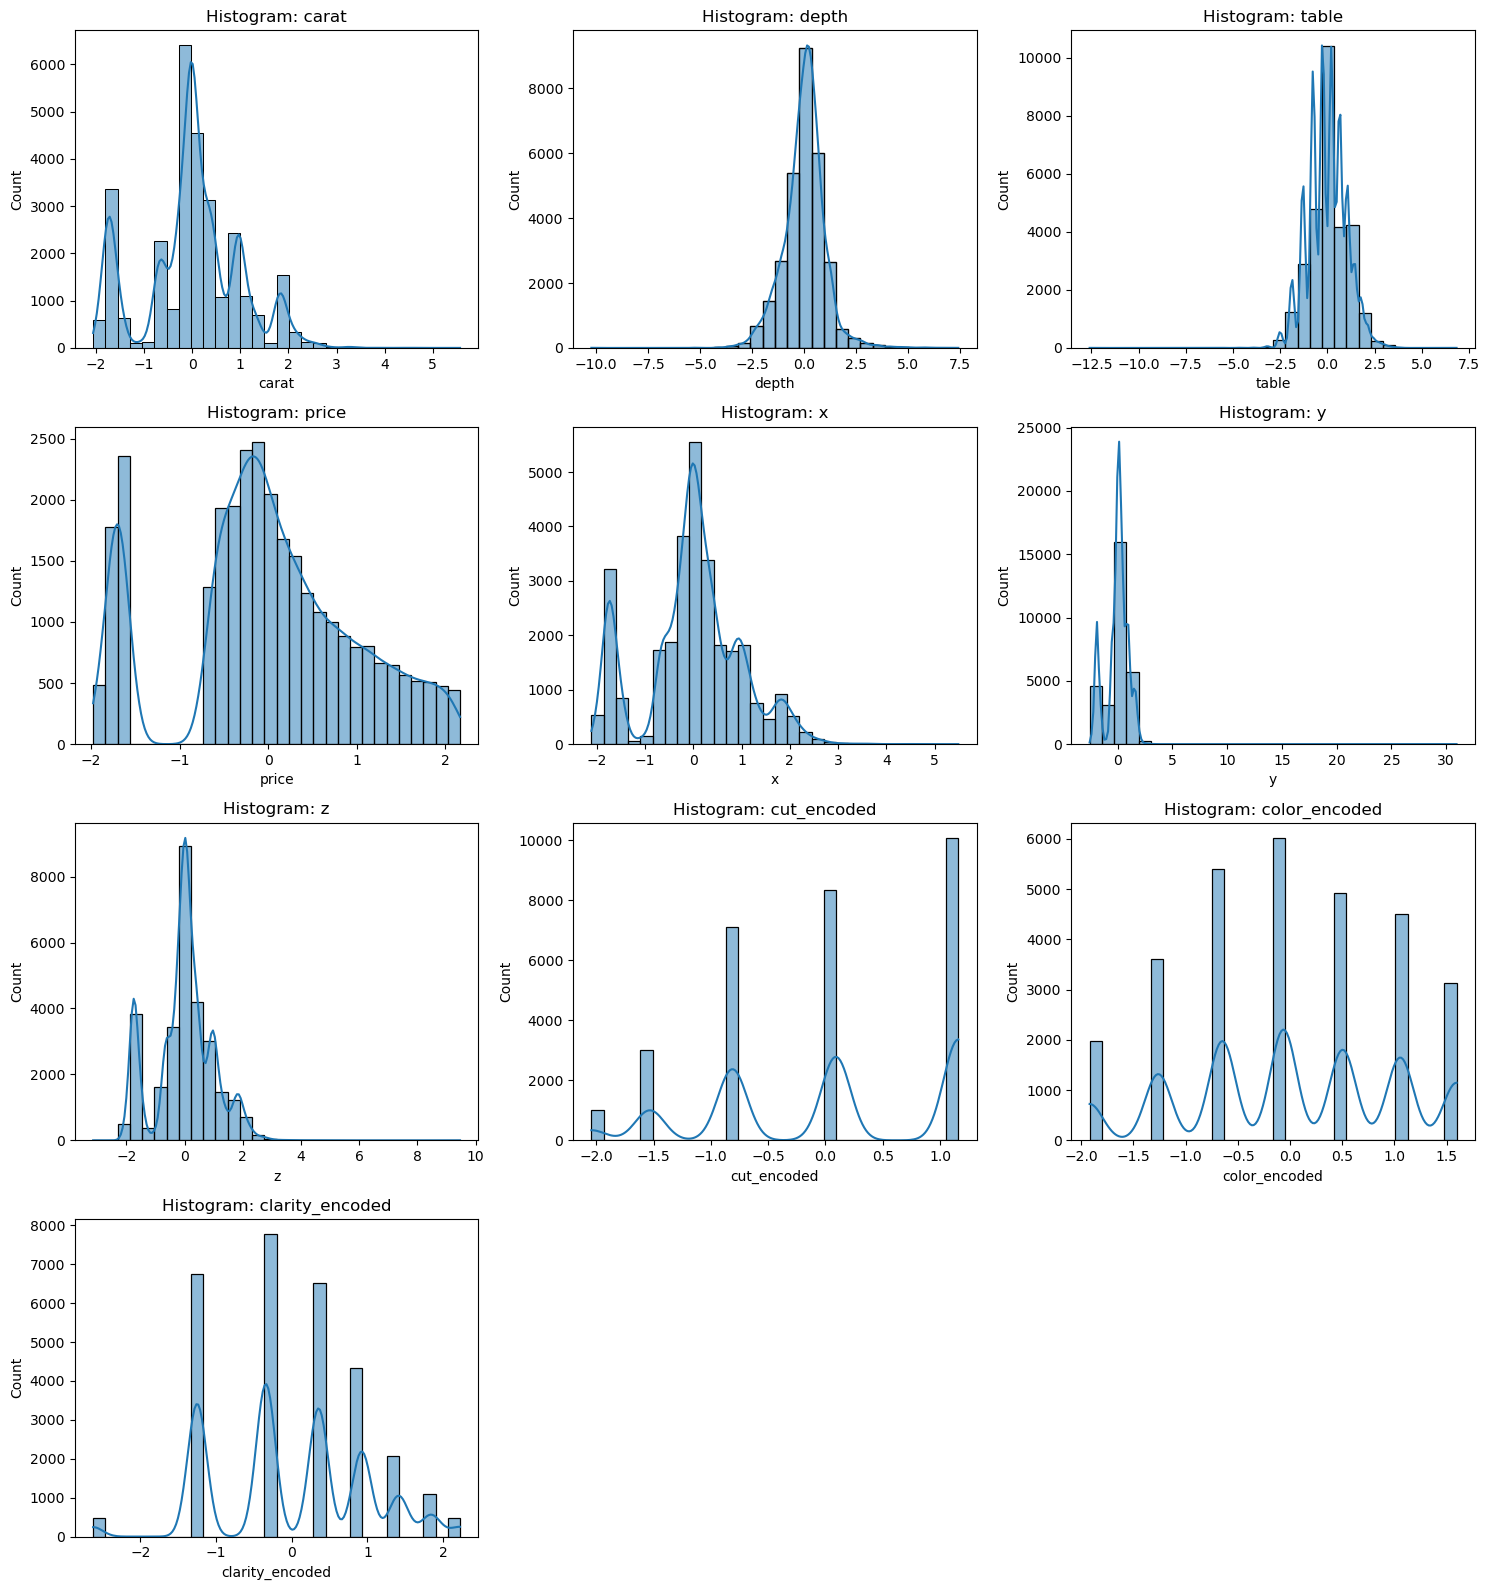

In [429]:
import matplotlib.pyplot as plt
import seaborn as sns

exclude_cols = ['cut', 'color', 'clarity']
plot_cols = [col for col in data.columns if pd.api.types.is_numeric_dtype(data[col]) and col not in exclude_cols]

n_cols = 3
n_rows = (len(plot_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(plot_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Histogram: {col}')
    plt.tight_layout()

plt.show()


In [ ]:
from scipy.stats import skew, kurtosis

exclude_cols = ['cut', 'color', 'clarity']
numeric_cols = [col for col in data.columns if pd.api.types.is_numeric_dtype(data[col]) and col not in exclude_cols]

skew_values = data[numeric_cols].apply(skew)
kurtosis_values = data[numeric_cols].apply(kurtosis)

summary_stats = pd.DataFrame({
    'Skewness': skew_values,
    'Kurtosis': kurtosis_values
                            })

print(summary_stats)


                 Skewness   Kurtosis
carat           -0.000747   0.026054
depth            0.075659   3.924247
table           -0.027265   0.979428
price           -0.086448  -0.403887
x               -0.023479   0.049526
y                0.437186  30.861272
z               -0.002639   0.407326
cut_encoded     -0.254472  -1.125642
color_encoded   -0.138985  -0.863739
clarity_encoded -0.013350  -0.452374


In [431]:
# We can see that kurtosis value in y_pt as 30.86.
# After applied power transformer the y value doesn't change so we have to neglect as it is same.

In [432]:
data

carat      cut color clarity     depth     table     price  \
1     -1.970629    Ideal     E     SI2 -0.205357 -1.299280 -1.978440   
2     -2.029918  Premium     E     SI1 -1.316978  1.430547 -1.978440   
3     -1.970629     Good     E     VS1 -3.121801  2.722682 -1.977312   
4     -1.796569  Premium     I     VS2  0.399339  0.208953 -1.969471   
5     -1.739763     Good     J     SI2  1.015306  0.208953 -1.968359   
...         ...      ...   ...     ...       ...       ...       ...   
29542 -1.437347    Ideal     G     SI1  0.263989 -2.506426 -1.641167   
29543 -1.491127     Fair     H     VS2  2.281247  0.644399 -1.641167   
29544 -1.410648  Premium     E     SI2 -0.536446  1.050808 -1.641167   
29545 -1.410648     Good     G     SI1  1.223142 -1.299280 -1.641167   
29546 -1.410648     Good     G     SI1  0.877448  0.208953 -1.641167   

              x         y         z  cut_encoded  color_encoded  \
1     -2.011029 -2.309955 -2.036763     1.158891       1.055172   
2     -2.048452 -2.456583 -2.158989     0.090993       1.055172   
3     -1.947565 -2.216413 -2.158989    -1.531673       1.055172   
4     -1.849801 -2.051458 -1.822176     0.090993      -1.262363   
5     -1.755771 -1.928833 -1.686865    -1.531673      -1.920208   
...         ...       ...       ...          ...            ...   
29542 -1.427814 -1.437232 -1.389067     1.158891      -0.062995   
29543 -1.588304 -1.646181 -1.389067    -2.042144      -0.649057   
29544 -1.375345 -1.338606 -1.401393     0.090993       1.055172   
29545 -1.435254 -1.447125 -1.314383    -1.531673      -0.062995   
29546 -1.464876 -1.486753 -1.376706    -1.531673      -0.062995   

       clarity_encoded  
1            -1.248685  
2            -0.341487  
3             0.924054  
4             0.353539  
5            -1.248685  
...                ...  
29542        -0.341487  
29543         0.353539  
29544        -1.248685  
29545        -0.341487  
29546        -0.341487  

[29546 rows x 13 columns]

In [ ]:
from scipy.stats.mstats import winsorize

data['y'] = winsorize(data['y'], limits=[0.01, 0.01])


In [ ]:
from scipy.stats import skew, kurtosis

exclude_cols = ['cut', 'color', 'clarity']
numeric_cols = [col for col in data.columns if pd.api.types.is_numeric_dtype(data[col]) and col not in exclude_cols]

skew_values = data[numeric_cols].apply(skew)
kurtosis_values = data[numeric_cols].apply(kurtosis)

summary_stats = pd.DataFrame({
    'Skewness': skew_values,
    'Kurtosis': kurtosis_values
                            })

print(summary_stats)

                 Skewness  Kurtosis
carat           -0.000747  0.026054
depth            0.075659  3.924247
table           -0.027265  0.979428
price           -0.086448 -0.403887
x               -0.023479  0.049526
y               -0.616196 -0.055954
z               -0.002639  0.407326
cut_encoded     -0.254472 -1.125642
color_encoded   -0.138985 -0.863739
clarity_encoded -0.013350 -0.452374


In [ ]:
from scipy.stats.mstats import winsorize

data['depth'] = winsorize(data['depth'], limits=[0.05, 0.05])


In [ ]:

exclude_cols = ['cut', 'color', 'clarity']
numeric_cols = [col for col in data.columns if pd.api.types.is_numeric_dtype(data[col]) and col not in exclude_cols]


skew_values = data[numeric_cols].apply(skew)
kurtosis_values = data[numeric_cols].apply(kurtosis)


summary_stats = pd.DataFrame({
    'Skewness': skew_values,
    'Kurtosis': kurtosis_values
})

print(summary_stats)

                 Skewness  Kurtosis
carat           -0.000747  0.026054
depth           -0.290682 -0.491752
table           -0.027265  0.979428
price           -0.086448 -0.403887
x               -0.023479  0.049526
y               -0.616196 -0.055954
z               -0.002639  0.407326
cut_encoded     -0.254472 -1.125642
color_encoded   -0.138985 -0.863739
clarity_encoded -0.013350 -0.452374


# Corelation Heatmap

In [437]:
# we have to find corelation of the input variables as well as target variables
# if the corelation in between variable is high we have to remove that one


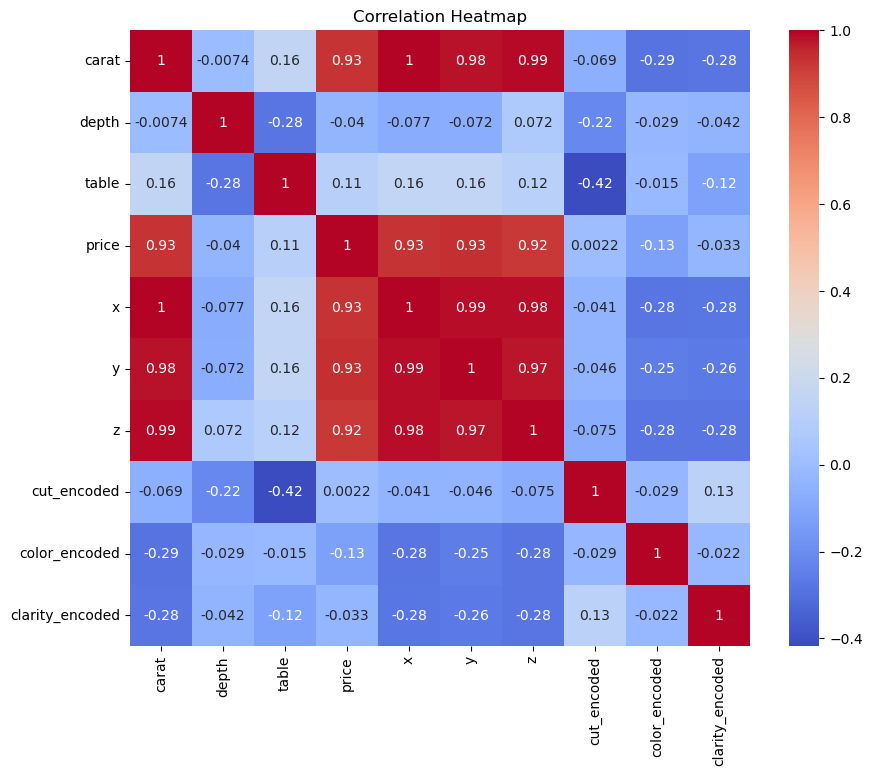

In [438]:
import seaborn as sns
plt.figure(figsize=(10,8))
numeric_cols = [col for col in data.columns if pd.api.types.is_numeric_dtype(data[col])]
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [439]:
data = data.drop(columns=['y', 'z'])

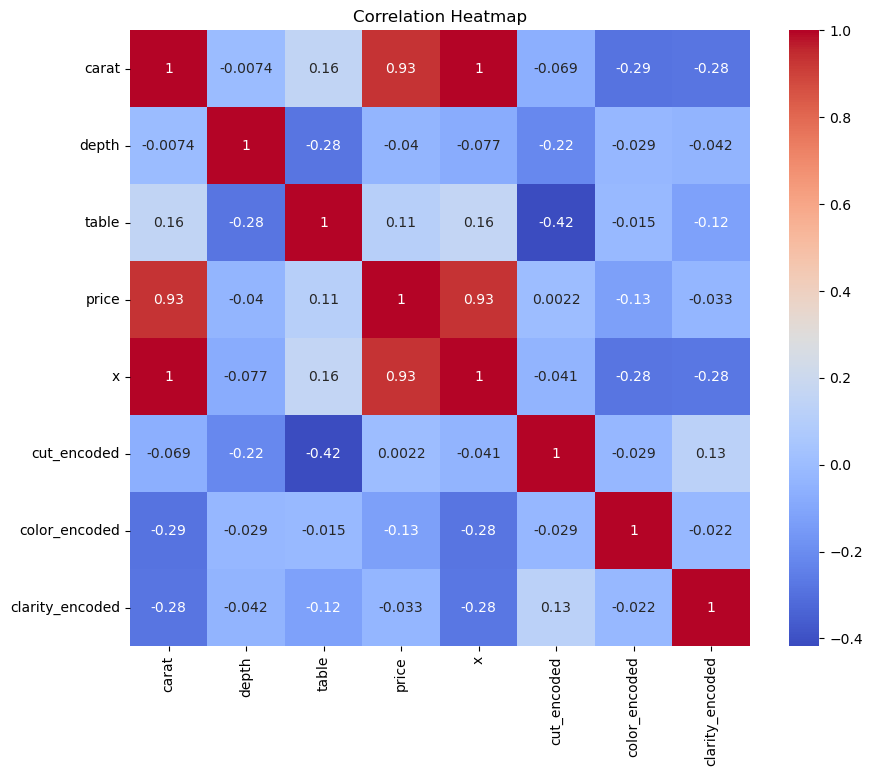

In [440]:
import seaborn as sns
plt.figure(figsize=(10,8))
numeric_cols = [col for col in data.columns if pd.api.types.is_numeric_dtype(data[col])]
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [441]:

data = data.drop(columns=['cut', 'color', 'clarity'])


# Standard Scaling 

In [442]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


In [443]:
data

carat     depth     table     price         x  cut_encoded  \
1     -1.970629 -0.205357 -1.299280 -1.978440 -2.011029     1.158891   
2     -2.029918 -1.316978  1.430547 -1.978440 -2.048452     0.090993   
3     -1.970629 -1.699816  2.722682 -1.977312 -1.947565    -1.531673   
4     -1.796569  0.399339  0.208953 -1.969471 -1.849801     0.090993   
5     -1.739763  1.015306  0.208953 -1.968359 -1.755771    -1.531673   
...         ...       ...       ...       ...       ...          ...   
29542 -1.437347  0.263989 -2.506426 -1.641167 -1.427814     1.158891   
29543 -1.491127  1.432237  0.644399 -1.641167 -1.588304    -2.042144   
29544 -1.410648 -0.536446  1.050808 -1.641167 -1.375345     0.090993   
29545 -1.410648  1.223142 -1.299280 -1.641167 -1.435254    -1.531673   
29546 -1.410648  0.877448  0.208953 -1.641167 -1.464876    -1.531673   

       color_encoded  clarity_encoded  
1           1.055172        -1.248685  
2           1.055172        -0.341487  
3           1.055172         0.924054  
4          -1.262363         0.353539  
5          -1.920208        -1.248685  
...              ...              ...  
29542      -0.062995        -0.341487  
29543      -0.649057         0.353539  
29544       1.055172        -1.248685  
29545      -0.062995        -0.341487  
29546      -0.062995        -0.341487  

[29546 rows x 8 columns]

In [444]:
data

carat     depth     table     price         x  cut_encoded  \
1     -1.970629 -0.205357 -1.299280 -1.978440 -2.011029     1.158891   
2     -2.029918 -1.316978  1.430547 -1.978440 -2.048452     0.090993   
3     -1.970629 -1.699816  2.722682 -1.977312 -1.947565    -1.531673   
4     -1.796569  0.399339  0.208953 -1.969471 -1.849801     0.090993   
5     -1.739763  1.015306  0.208953 -1.968359 -1.755771    -1.531673   
...         ...       ...       ...       ...       ...          ...   
29542 -1.437347  0.263989 -2.506426 -1.641167 -1.427814     1.158891   
29543 -1.491127  1.432237  0.644399 -1.641167 -1.588304    -2.042144   
29544 -1.410648 -0.536446  1.050808 -1.641167 -1.375345     0.090993   
29545 -1.410648  1.223142 -1.299280 -1.641167 -1.435254    -1.531673   
29546 -1.410648  0.877448  0.208953 -1.641167 -1.464876    -1.531673   

       color_encoded  clarity_encoded  
1           1.055172        -1.248685  
2           1.055172        -0.341487  
3           1.055172         0.924054  
4          -1.262363         0.353539  
5          -1.920208        -1.248685  
...              ...              ...  
29542      -0.062995        -0.341487  
29543      -0.649057         0.353539  
29544       1.055172        -1.248685  
29545      -0.062995        -0.341487  
29546      -0.062995        -0.341487  

[29546 rows x 8 columns]

In [445]:
# rename the column and rearrange the columns in the table

In [ ]:
cols = data.columns.tolist()
if 'price' in cols:
	cols.remove('price')
	cols.insert(2, 'price')
	data = data[cols]

Index(['carat', 'depth', 'price', 'table', 'x', 'cut_encoded', 'color_encoded',
       'clarity_encoded'],
      dtype='object')


In [447]:
# split the data

In [448]:
X = data.drop(columns=['price'])  
y = data['price']          

Original shape: (29546, 7)
Reduced shape after PCA: (29546, 6)
Explained variance ratio: [0.33167915 0.19971471 0.17293959 0.13913392 0.10247613 0.05380929]
Cumulative explained variance: [0.33167915 0.53139386 0.70433345 0.84346737 0.9459435  0.99975279]


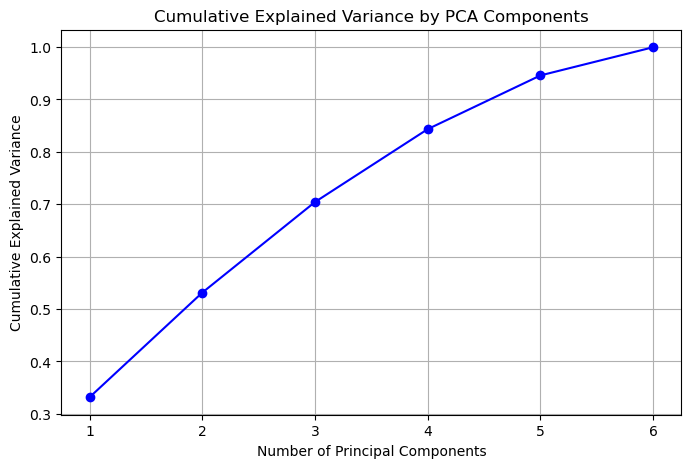

In [449]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)


print("Original shape:", X.shape)
print("Reduced shape after PCA:", X_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", pca.explained_variance_ratio_.cumsum())


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
    pca.explained_variance_ratio_.cumsum(), marker='o', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


# Linear Regression 

In [450]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd

In [451]:
X

carat     depth     table         x  cut_encoded  color_encoded  \
1     -1.970629 -0.205357 -1.299280 -2.011029     1.158891       1.055172   
2     -2.029918 -1.316978  1.430547 -2.048452     0.090993       1.055172   
3     -1.970629 -1.699816  2.722682 -1.947565    -1.531673       1.055172   
4     -1.796569  0.399339  0.208953 -1.849801     0.090993      -1.262363   
5     -1.739763  1.015306  0.208953 -1.755771    -1.531673      -1.920208   
...         ...       ...       ...       ...          ...            ...   
29542 -1.437347  0.263989 -2.506426 -1.427814     1.158891      -0.062995   
29543 -1.491127  1.432237  0.644399 -1.588304    -2.042144      -0.649057   
29544 -1.410648 -0.536446  1.050808 -1.375345     0.090993       1.055172   
29545 -1.410648  1.223142 -1.299280 -1.435254    -1.531673      -0.062995   
29546 -1.410648  0.877448  0.208953 -1.464876    -1.531673      -0.062995   

       clarity_encoded  
1            -1.248685  
2            -0.341487  
3             0.924054  
4             0.353539  
5            -1.248685  
...                ...  
29542        -0.341487  
29543         0.353539  
29544        -1.248685  
29545        -0.341487  
29546        -0.341487  

[29546 rows x 7 columns]

In [465]:
X.columns

Index(['carat', 'depth', 'table', 'x', 'cut_encoded', 'color_encoded',
       'clarity_encoded'],
      dtype='object')

In [452]:
y

1       -1.978440
2       -1.978440
3       -1.977312
4       -1.969471
5       -1.968359
           ...   
29542   -1.641167
29543   -1.641167
29544   -1.641167
29545   -1.641167
29546   -1.641167
Name: price, Length: 29546, dtype: float64

In [453]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [454]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [455]:
y_pred = model.predict(X_test)

In [456]:
n = X_test.shape[0]  
p = X_test.shape[1]

In [457]:
n

5910

In [458]:
p

7

# Adjusted R² Score, Mean Squared Error, Mean Absolute Error

In [459]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print(f"R² Score: {r2:.4f}")
print(f"Adjusted R² Score: {adj_r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")


R² Score: 0.9522
Adjusted R² Score: 0.9522
Mean Squared Error: 0.0475
Mean Absolute Error: 0.1624


In [460]:
# If we need to increase the percentage of adj_r2 and r2_score use Random forest regressor 

In [461]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Adjusted R² Score: {adj_r2:.4f}")

R² Score: 0.9831
Mean Squared Error: 0.02
Mean Absolute Error: 0.09
Adjusted R² Score: 0.9830
